In [1]:
#Importing all Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
os.chdir('D:\Data Science\SPARKS FOUNDATION\Dataset TSF') ## reading system directory 

First we upload and read the dataset
**The Data**

Let's start by reading in SampleSuperstore.csv file into a pandas dataframe

In [3]:
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploratory Data Analysis on dataset


In [4]:
data.dtypes   #here we can see which column cosist of float and object value

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [5]:
data.describe() ## It gives the ovreall stats of data 

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.info() # it gives the basic info of data with memory constrains 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# total no of rowss and columns
data.shape

(9994, 13)

Dataset has 9994 rows and 13 columns

In [8]:
#Checking for the duplicate values in dataset
data.duplicated().sum()

17

17 duplicates values we  found , it might alter the accuracy so we are going to drop that values 



In [9]:
#Eliminating the duplicate values in the dataset
data.drop_duplicates(inplace=True)
data.shape

(9977, 13)

So now  our data actually has 9977 rows and the same 13 columns
 As dataset  consist of only one country(USA) So we eliminate the columns that will not contribute to our data analysis i.e postal codes won't help us here.

In [10]:
#eliminating country and postal code
data=data.drop('Country',axis=1)
data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
data=data.drop('Postal Code',axis=1)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
data.shape

(9977, 11)

We have eliminated country and postal codes,
Now w
e have these 9977 rows and 11 columns for our exploratory data analysis as of now. We might eliminate the unfavourable datasets as we progress.

# Checking the missing values in the dataset

In [13]:
data.isnull()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False


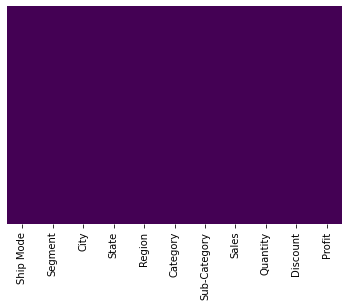

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [15]:
data.isna().sum() ## Here clearly see that there are no missing values in the dataset 

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

 From the above figure and data we can clearly see that we dont have any null values in tthe dataset.

In [16]:
# we are considering only numerical values cokumns

data_num=data.select_dtypes(include=[np.number])

In [17]:
data_num.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


(4.5, -0.5)

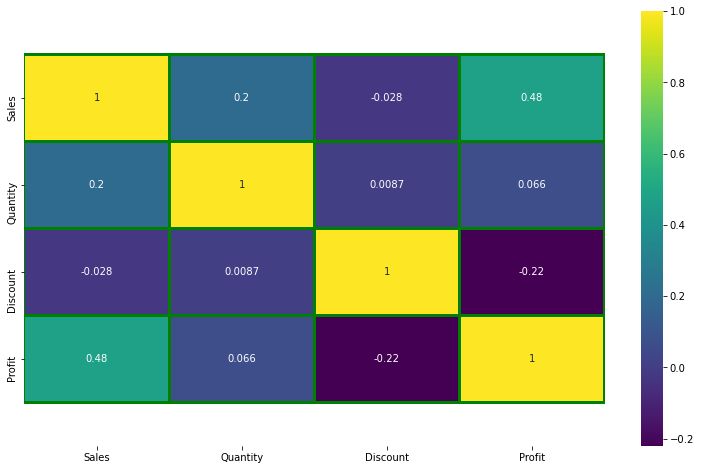

In [18]:
#Selecting numeric datatypes only
data_num=data.select_dtypes(include=[np.number])
#creating a correlation heatmap
fig = plt.figure(figsize=(13,8))

sns.heatmap(data_num.corr(),cmap='viridis', annot=True, linecolor='green',linewidths=1.6)

b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)



According to our spectral index on the right,1 means a strong positive correlation and it goes on decreasing further towards the bottom of the spectrum index. One can easily figure out the correlation between two factors. As we can see above, there is no strong correlation between any two factors. But the negative correlation between profit and discount gives the obvious indication that higher discounts lead to lesser profits.



In [19]:
data_num.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [20]:
data_num.shape

(9977, 4)

Now we check for any outliers.They are values that are notably different, let's say very high or very low values as compared to other data points and they can cause problems in analysis.

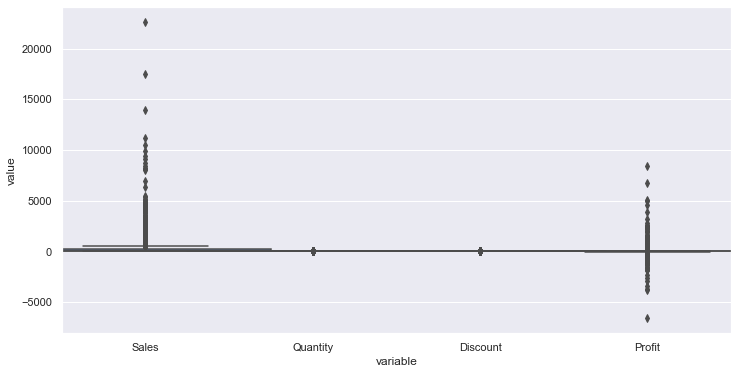

In [21]:
# for detecting the outliers we use boxplot 
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")

sns.boxplot(x="variable", y="value", data=pd.melt(data_num), width=1.5)
plt.show()


as from the above fig we can we see that Sales and Profit have outliers value. For the detection of outliers we use Interquartile Range method (IQR)

# Interquartile Range Method (IQR)
Theoretically any value below Q1-1.5(IQR) and Q3+1.5(IQR) is an outlier 

In [22]:
#importing for stats 
from scipy import stats
Q1= data_num.quantile(0.25)
Q3= data_num.quantile(0.75)
IQR = Q3-Q1


In [23]:
IQR

Sales       192.6700
Quantity      3.0000
Discount      0.2000
Profit       27.6458
dtype: float64

In [24]:
#range of IQR
Lower_whisker =Q1-1.5*IQR
Upper_whisker=Q3+1.5*IQR

In [25]:
#outliers range 
print('Lower Range:-',Lower_whisker)
print()
print('Upper Range:-' , Upper_whisker)

Lower Range:- Sales      -271.7050
Quantity     -2.5000
Discount     -0.3000
Profit      -39.7425
dtype: float64

Upper Range:- Sales       498.9750
Quantity      9.5000
Discount      0.5000
Profit       70.8407
dtype: float64


In [26]:
#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data2 = data[~((data_num < (Q1-1.5*IQR)) | (data_num > (Q3+1.5*IQR))).any(axis=1)]


In [27]:

data2.shape

(7127, 11)

 by excluding the outliers from old dataset we got new dataset data2 i.e 7127 rows and 11 columns , 2850 rows has been eliminated
 

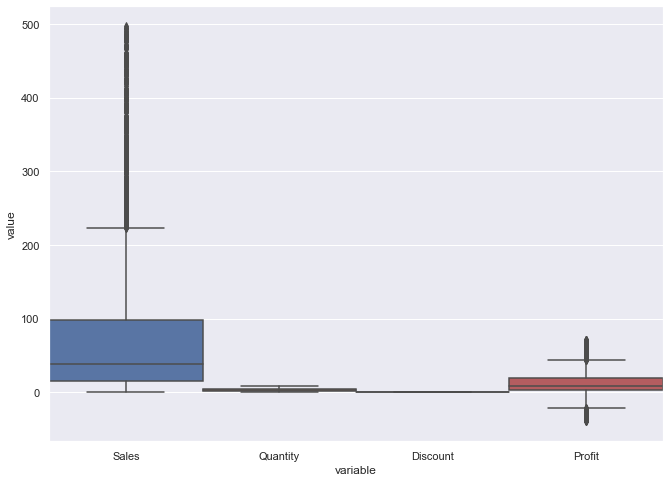

In [28]:
#selecting only numeric values
data2_num=data2.select_dtypes(include=[np.number])
# checking whether the outliers are removed or not(visual representation)
plt.figure(figsize=[11,8])
sns.set(style="darkgrid")
sns.boxplot(x="variable", y="value", data=pd.melt(data2_num), width=1)
plt.show()


As we can see above, the number of outliers has been reduced significantly by the IQR method. We shall now proceed to more categorical data analysis.



In [29]:
#displaying random rows of our new dataset without outliers
data2.sample(5)


,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1227,First Class,Consumer,New York City,New York,East,Office Supplies,Storage,193.860,2,0.0,11.6316
6723,Second Class,Consumer,Nashua,New Hampshire,East,Office Supplies,Fasteners,14.820,6,0.0,6.9654
5779,Standard Class,Consumer,Los Angeles,California,West,Furniture,Chairs,112.648,1,0.2,11.2648
5941,Second Class,Consumer,Los Angeles,California,West,Office Supplies,Art,5.880,2,0.0,1.5876
1927,First Class,Consumer,Denver,Colorado,West,Office Supplies,Paper,88.768,2,0.2,31.0688


In [30]:
data2['Category'].value_counts() ##counts of each category.



Office Supplies    4670
Furniture          1262
Technology         1195
Name: Category, dtype: int64

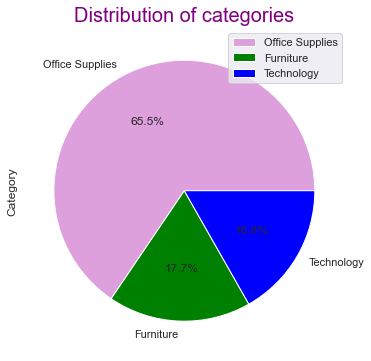

In [31]:
#piechart for distribution of the 3 main categories
plt.figure(figsize=(10,6))
colors_list=['plum','green','blue']
data2['Category'].value_counts().plot.pie(autopct="%1.1f%%",colors=colors_list)
plt.title(label="Distribution of categories",color='purple',fontsize='20')
plt.legend(loc= 0)
plt.show()


The stores have a wider variety of office supplies, followed by furniture and then technology.



In [32]:
data2['Sub-Category'].nunique() ## no of unique products in sub-category 


17

In [33]:
data2['Sub-Category'].value_counts() # no of each products in sub-category 

Paper          1225
Binders         784
Art             778
Furnishings     737
Storage         632
Accessories     601
Phones          573
Labels          346
Chairs          320
Appliances      296
Envelopes       226
Fasteners       211
Supplies        172
Bookcases       113
Tables           92
Machines         18
Copiers           3
Name: Sub-Category, dtype: int64

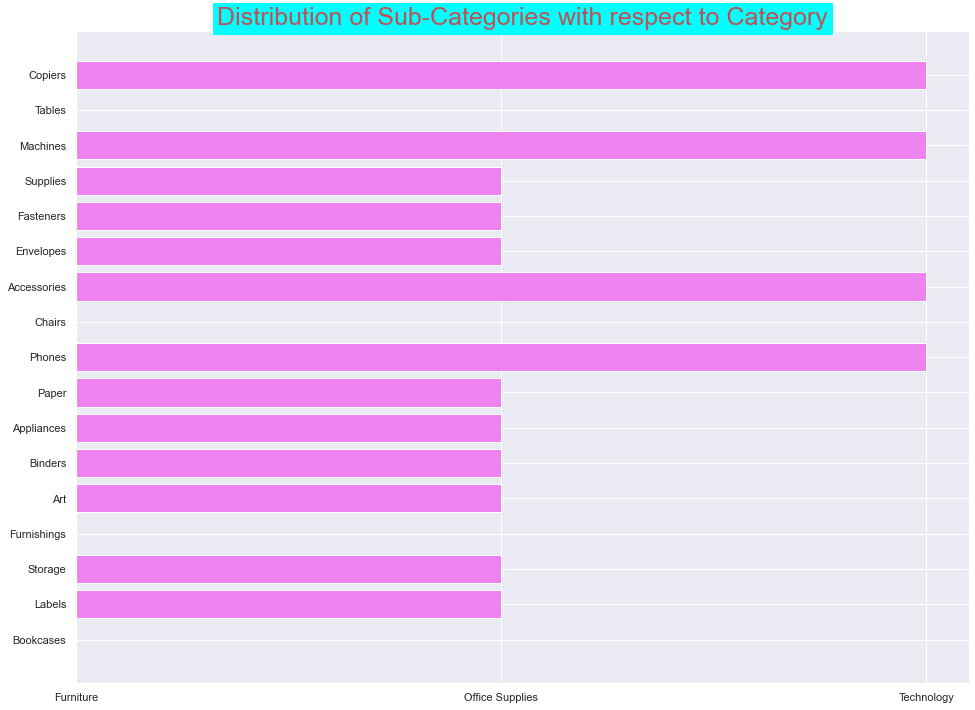

In [34]:
#Distribution of Sub-categories with respect to Category
plt.figure(figsize=(16,12))
plt.barh('Sub-Category','Category',data=data2,color='violet')
plt.title(label="Distribution of Sub-Categories with respect to Category", fontsize='25',color='r',backgroundcolor='cyan')
plt.show()


Text(0.5, 1.0, ' Sub category products')

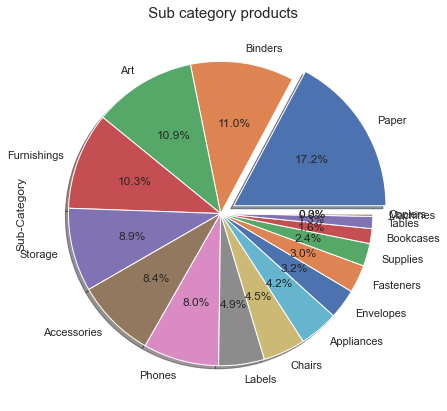

In [35]:
# Pie-chart of Sub-categories
plt.figure(figsize=(15,7))
sub_cat = data2['Sub-Category'].value_counts()
theme = plt.get_cmap('hsv')
sub_cat.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.title(' Sub category products', fontsize=15)



The store has wide variety of paper, followed by binders and others. The least variety is found for machines and our new dataset contains zero variety of copiers.

I've used the explode function above for pie chart to prevent overlapping and make it look better.

<ipython-input-36-405ba1fd7eb8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(15,12),color={'green','red'}, width=0.3)


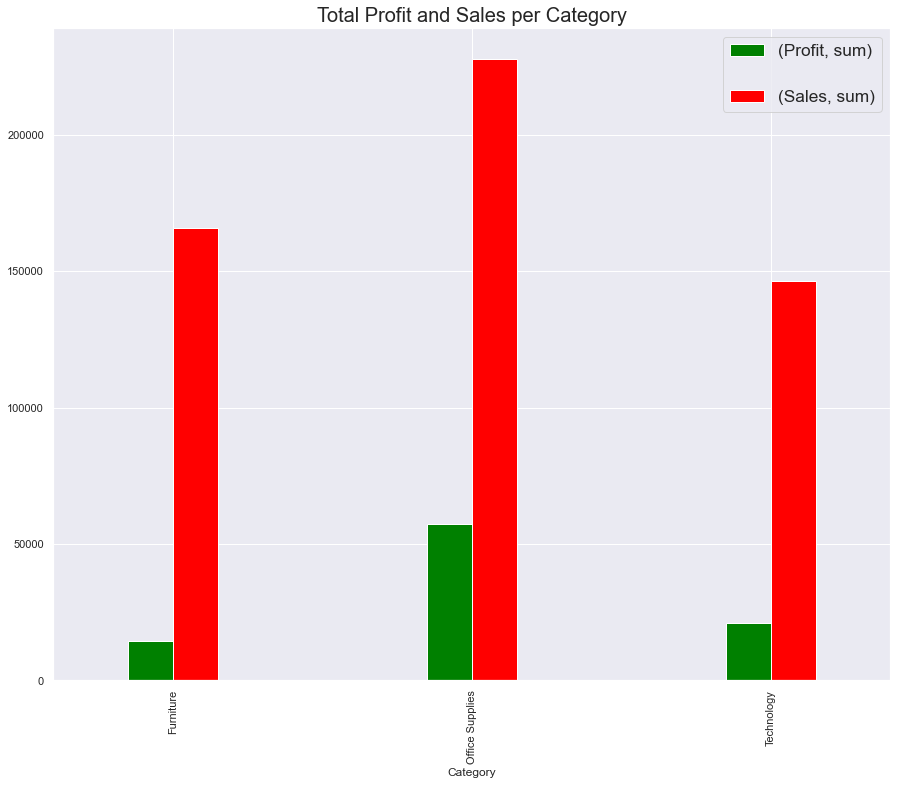

In [36]:
#Profit and Sales per Category
data2.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(15,12),color={'green','red'}, width=0.3)
plt.legend(loc=1,fontsize='x-large',labelspacing=1.8)
plt.title('Total Profit and Sales per Category', fontsize=20)
plt.show()


The sales and profit achieved for office supplies is the most. 



# Visualize the total Sales and Profit by Sub-category


<ipython-input-37-04d6a721b9bd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sale_profit_sum = data2.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])


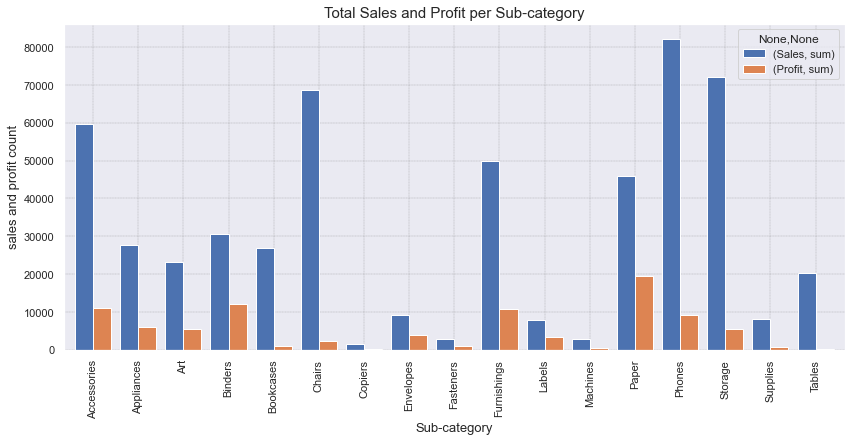

In [37]:
sale_profit_sum = data2.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
sale_profit_sum.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit count",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)


Analysis - Highest profit is earned in Papers  while Selling price for Chairs and Phones is extremely high compared to other products.



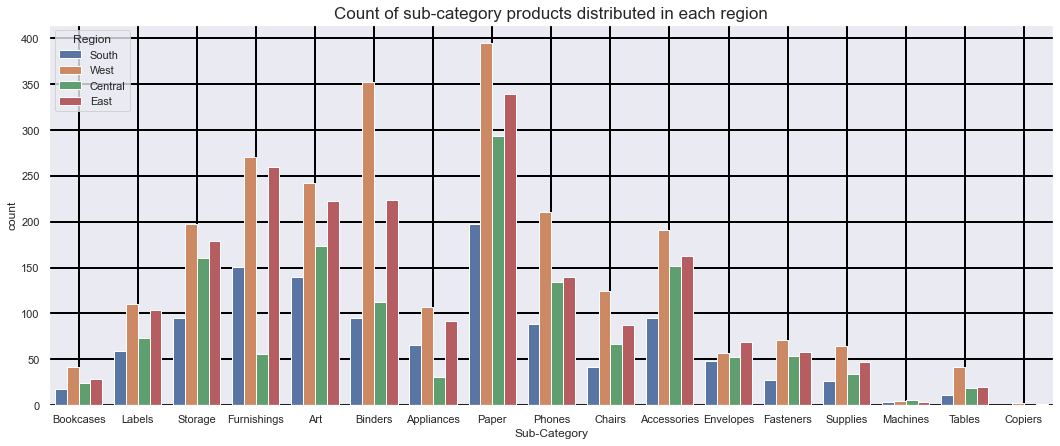

In [38]:
##Visualizing the how much prodcuts distributed regionwise
plt.figure(figsize=(18,7))
sns.countplot( data=data2, x='Sub-Category', hue='Region')
plt.title("Count of sub-category products distributed in each region", fontsize=17)
plt.grid(color='black', linestyle='-', linewidth=2)


Analysis - People residing in Western and eastern part of US tend to order more from superstore.



Thank You!